<a href="https://colab.research.google.com/github/20KMJ/ESAA7/blob/main/%EC%82%AC%EA%B3%A0%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 업로드

In [2]:
from google.colab import drive
drive.mount("/content/drive")

# 경로 이동
%cd /content/drive/MyDrive/공모전/교통사고데이터분석

Mounted at /content/drive
/content/drive/MyDrive/공모전/교통사고데이터분석


In [3]:
import pandas as pd
import numpy as np
import datetime as datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
traffic = pd.read_csv('data/traffic.csv')
traffic = traffic.drop(['ADDR1','state'], axis=1)
traffic['RECV_CPLT_DM'] = pd.to_datetime(traffic['RECV_CPLT_DM'])

In [34]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369768 entries, 0 to 369767
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   RECV_CPLT_DM   369768 non-null  datetime64[ns]
 1   NPA_CL         369768 non-null  int64         
 2   EVT_STAT_CD    369768 non-null  int64         
 3   EVT_CL_CD      369768 non-null  int64         
 4   RPTER_SEX      369768 non-null  int64         
 5   HPPN_PNU_ADDR  369768 non-null  object        
 6   HPPN_X         369768 non-null  float64       
 7   HPPN_Y         369768 non-null  float64       
 8   SME_EVT_YN     369768 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 25.4+ MB


In [35]:
traffic.head(3)

,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y
1,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,unknown
2,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y


# 데이터 분석

In [40]:
traffic['year'] = traffic['RECV_CPLT_DM'].dt.strftime("%Y")
traffic['y-m'] = traffic['RECV_CPLT_DM'].dt.strftime("%Y-%m")
traffic.head(3)

,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,year,y-m
0,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,2020,2020-01
1,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,unknown,2020,2020-01
2,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,2020,2020-01


In [33]:
from datetime import datetime, date

def what_day_is_it(date):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    day = date.weekday()
    return(days[day])

In [41]:
traffic['day'] = traffic.apply(lambda x: what_day_is_it(x['RECV_CPLT_DM']), axis=1)
traffic.head(3)

,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,year,y-m,day
0,2020-01-01 00:03:11,19,10,406,1,충청남도 공주시 정안면 어물리(정안면) 33-2,127.148714,36.605751,Y,2020,2020-01,Wed
1,2020-01-01 00:18:08,19,10,403,1,충청남도 논산시 채운면 장화리(채운면) 533,127.030921,36.164643,unknown,2020,2020-01,Wed
2,2020-01-01 00:20:01,19,10,406,1,세종특별자치시 세종시 소담동(소담동) 32-92,127.305511,36.479819,Y,2020,2020-01,Wed


In [52]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369768 entries, 0 to 369767
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   RECV_CPLT_DM   369768 non-null  datetime64[ns]
 1   NPA_CL         369768 non-null  int64         
 2   EVT_STAT_CD    369768 non-null  int64         
 3   EVT_CL_CD      369768 non-null  int64         
 4   RPTER_SEX      369768 non-null  int64         
 5   HPPN_PNU_ADDR  369768 non-null  object        
 6   HPPN_X         369768 non-null  float64       
 7   HPPN_Y         369768 non-null  float64       
 8   SME_EVT_YN     369768 non-null  object        
 9   year           369768 non-null  object        
 10  y-m            369768 non-null  object        
 11  day            369768 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 33.9+ MB


In [59]:
traffic['year']=traffic['year'].astype(int)

In [60]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369768 entries, 0 to 369767
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   RECV_CPLT_DM   369768 non-null  datetime64[ns]
 1   NPA_CL         369768 non-null  int64         
 2   EVT_STAT_CD    369768 non-null  int64         
 3   EVT_CL_CD      369768 non-null  int64         
 4   RPTER_SEX      369768 non-null  int64         
 5   HPPN_PNU_ADDR  369768 non-null  object        
 6   HPPN_X         369768 non-null  float64       
 7   HPPN_Y         369768 non-null  float64       
 8   SME_EVT_YN     369768 non-null  object        
 9   year           369768 non-null  int64         
 10  y-m            369768 non-null  object        
 11  day            369768 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 33.9+ MB


In [61]:
# 사고데이터 = 교통사고 + 사망.대형사고 + 인피도주(뺑소니)
traffic0 = traffic[traffic['EVT_CL_CD'].isin([401,404,405])]

traffic1 = traffic[traffic['EVT_CL_CD']==401] # 교통사고
traffic4 = traffic[traffic['EVT_CL_CD']==404] # 사망.대형사고
traffic5 = traffic[traffic['EVT_CL_CD']==405] # 인피도주 (뺑소니)

traffic2 = traffic[traffic['EVT_CL_CD']==402] # 교통불편
traffic3 = traffic[traffic['EVT_CL_CD']==403] # 교통위반
traffic6 = traffic[traffic['EVT_CL_CD']==406] # 음주운전

## 그래프 시각화

### 1. 사고 데이터(사고+사망+뺑소니)

#### 1-1. 월별

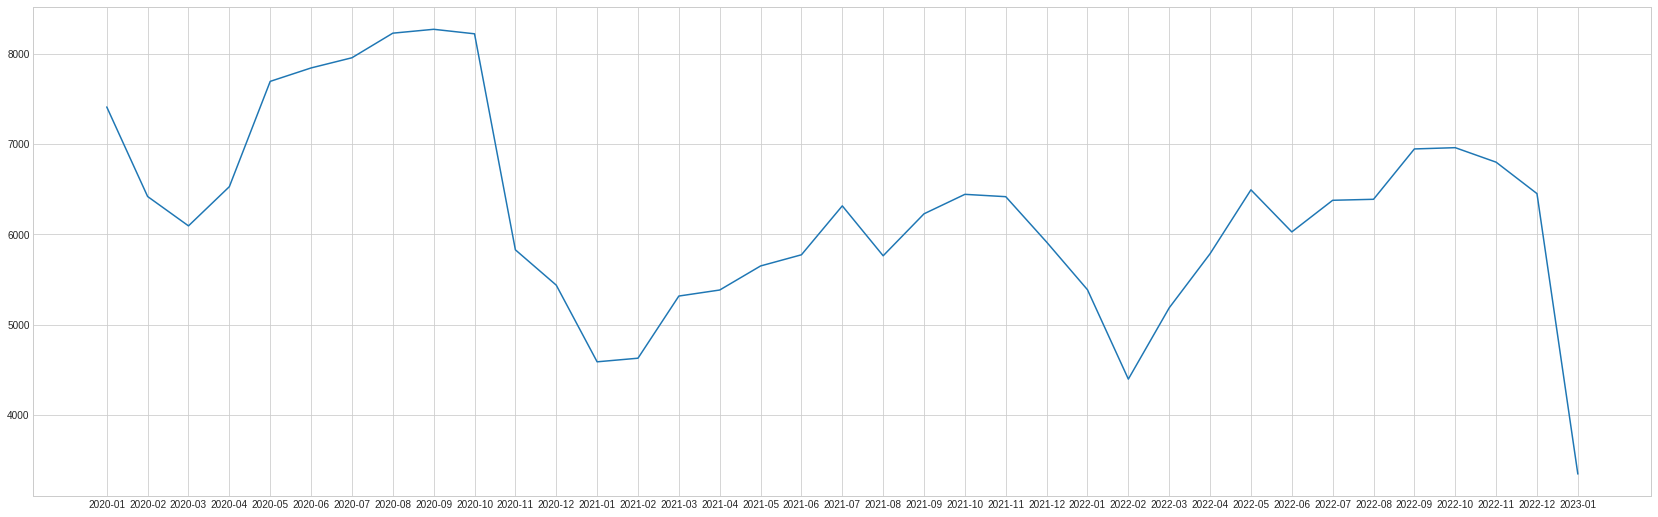

In [76]:
# 사고 데이터
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(29,9))

plt.plot(traffic0['y-m'].value_counts().sort_index())

3,4,5  봄,
6,7,8 = 여름,
9,10,11 = 가을, 
12,1,2 = 겨울
1. 2020년
  - 8,9,10월 여름~가을에 교통사고 多
  - 11,12월 겨울에 교통사고 少
2. 2021년
  - 9,10,11월 가을에 교통사고 多
  - 1,2월 겨울에 교통사고 少
3. 2022년
  - 9,10,11월 가을에 교통사고 多
  - 1,2,3월 겨울~봄에 교통사고 少

> 종합  
> - 가을에 교통사고가 많은 것이 특징
> - 겨울에 교통사고가 적은 것이 특징 (눈길이라 사고가 많을 줄 알았는데 오히려 적음. 이동량 자체가 적어서?)
> - 2020년에 전반적으로 교통사고 많은 것이 특징. 코로나와 관련?


*2023-01은 18일까지의 데이터 밖에 없어서 사고 수 적음. 분석에서 제외외

#### 1-2. 요일별

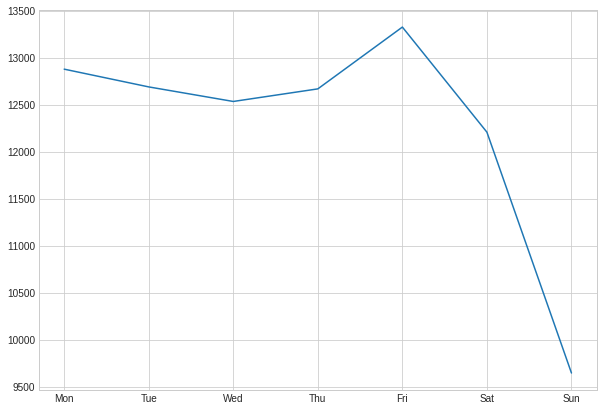

In [78]:
# 요일별 사고빈도(2020년)
x20 = traffic0[traffic0['year']==2020]['day'].value_counts()
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
x20 = x20.loc[weekday_order]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))

plt.plot(x20)

- 금요일 사고 빈도 多
- 일요일 사고 빈도 少
- 월,화,수로 갈수록 차츰 사고가 줄어들다가 금요일에 교통사고 급증하는 특징. 다시 주말에는 감소

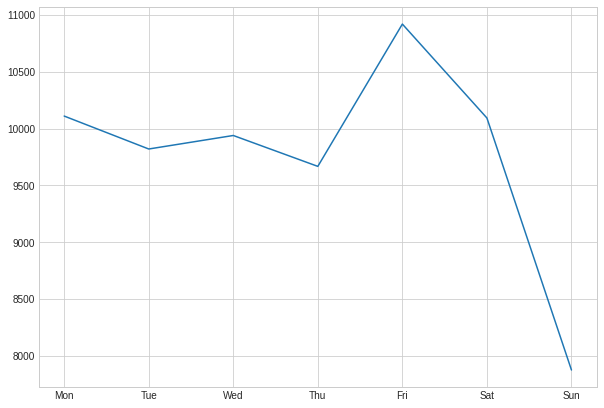

In [79]:
# 요일별 사고빈도(2021년)
x21 = traffic0[traffic0['year']==2021]['day'].value_counts()
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
x21 = x21.loc[weekday_order]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))

plt.plot(x21)

- 금요일 사고 빈도 多
- 일요일 사고 빈도 少
- 월,화,수,목으로 갈수록 차츰 사고가 줄어들다가 금요일에 교통사고 급증하는 특징. 주말에는 다시 감소

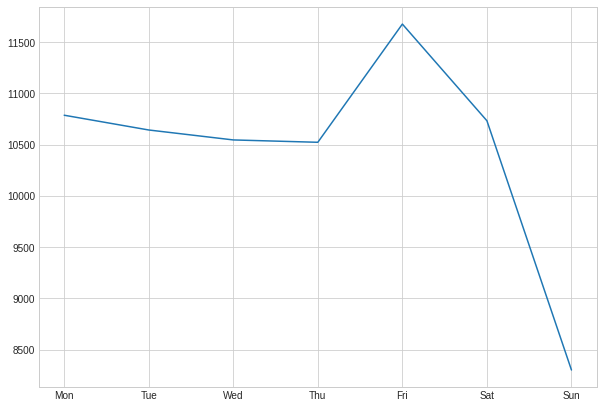

In [80]:
# 요일별 사고빈도(2022년)
x22 = traffic0[traffic0['year']==2022]['day'].value_counts()
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
x22 = x22.loc[weekday_order]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))

plt.plot(x22)

- 금요일 사고 빈도 多
- 일요일 사고 빈도 少
- 월,화,수, 목으로 갈수록 차츰 사고가 줄어들다가 금요일에 교통사고 급증하는 특징. 주말에는 다시 감소

> 종합  
- 2020~2022년 모두 금요일에 교통사고가 집중되는 경향
- 일요일은 상대적으로 적은 교통사고 발생
- 월에서 목으로 갈수록록 차츰 교통사고 줄어들다가 금요일에 급증. 주말에는 다시 감소

### 2. 음주운전 데이터

#### 2-1. 월별

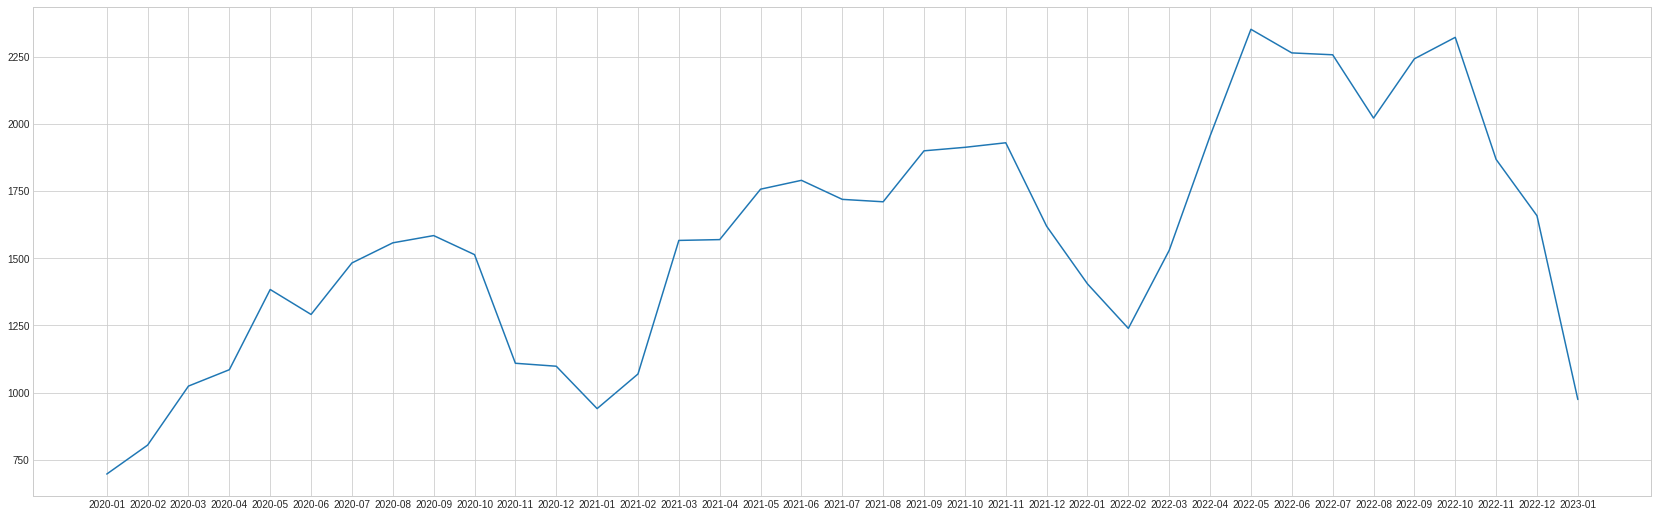

In [79]:
# 음주운전 데이터
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(29,9))

plt.plot(traffic6['y-m'].value_counts().sort_index())

- 음주운전은 갈수록 많아지는 추이
  - 이유1: 음주운전에 대한 경각심이 줄어서?
  - 이유2: 코로나로 주춤했던 술자리가 점차 늘어서?

- **음주운전 단속 강화 필요성 대두**

#### 2-2. 요일별

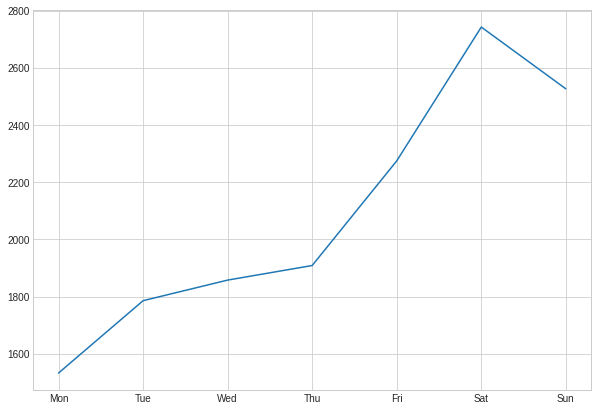

In [85]:
# 2020년
x6_20 = traffic6[traffic6['year']==2020]['day'].value_counts()
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
x6_20 = x6_20.loc[weekday_order]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))

plt.plot(x6_20)

- 월요일부터 금요일까지 증가하는 추세
- 토요일에 폭증하는 특징
- 일요일에는 토요일에 비해 감소하나 평일에 비해선 높음

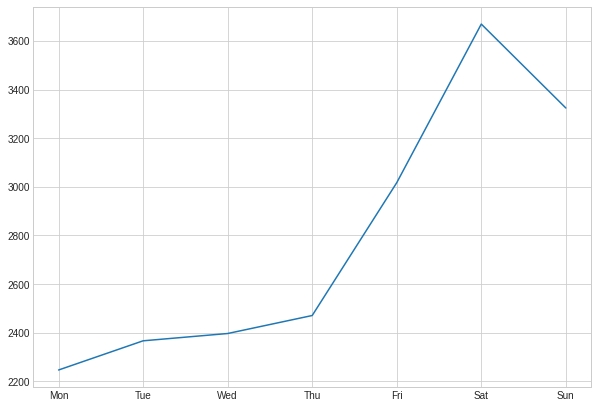

In [87]:
# 2021년
x6_21 = traffic6[traffic6['year']==2021]['day'].value_counts()
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
x6_21 = x6_21.loc[weekday_order]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))

plt.plot(x6_21)

- 2020년도와 같은 특징

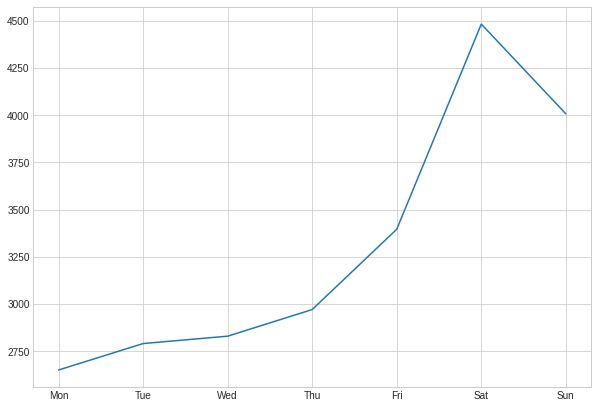

In [88]:
# 2022년
x6_22 = traffic6[traffic6['year']==2022]['day'].value_counts()
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
x6_22 = x6_22.loc[weekday_order]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))

plt.plot(x6_22)

- 이전 년도 데이터와 같은 특징

> 종합
- 요일별 음주운전 적발 빈도는 매년 같은 패턴을 반복함
- 즉, 월요일부터 금요일까지 차츰 음주운전 차량이 증가하다가 토요일에 급등하는 특징을 보임. 일요일에는 토요일에 비해선 감소하나, 평일에 비해선 높음음 

### 3. 강수량 & 교통사고 - 보류



In [7]:
import json
import requests
from bs4 import BeautifulSoup

url = 'http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'

queryParams = '?' + \
              'ServiceKey=' + ''+ \
              '&pageNo='+ '1' + \
              '&numOfRows='+ '999' + \
              '&dataType='+ 'JSON' + \
              '&dataCd='+ 'ASOS' + \
              '&dateCd='+ 'DAY' + \
              '&startDt='+ '20200101' + \
              '&endDt='+ '20221231' + \
              '&stnIds='+ '133' # \ 뒤에 공백 금지

result = requests.get(url + queryParams)
js = json.loads(result.content)
data_Daejeon = pd.DataFrame(js['response']['body']['items']['item'])

li = ['stnId','tm','avgTa','minTa','maxTa','sumRn','maxWs','avgWs','ddMes']

data_Daejeon.loc[:,li]

data_Daejeon[li].to_csv("weather_Daejeon.csv",index=False )

In [8]:
data_Daejeon.head(3)

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,133,대전,2020-01-01,-0.6,-7.7,0017,5.1,1439,,,...,5.3,8.5,11.0,16.1,18.2,1.1,1.6,,{눈}0350-{눈}{강도0}0600-0625. {박무}2355-{박무}{강도0}2...,
1,133,대전,2020-01-02,1.3,-2.8,0336,5.3,1410,,,...,4.9,8.4,11.0,16.0,18.2,0.6,0.8,,-{박무}-{박무}{강도0}0300-{박무}{강도0}0600-{박무}{강도0}090...,
2,133,대전,2020-01-03,2.0,-1.7,2400,7.7,1511,,,...,4.8,8.1,10.9,15.9,18.0,1.1,1.5,,-{박무}-{박무}{강도1}0300-{박무}{강도1}0600-{박무}{강도1}090...,


In [9]:
data_Daejeon.tail(3)

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
996,133,대전,2022-09-23,17.7,12.6,2330,24.5,1201,0.0,,...,25.0,25.3,24.9,22.8,19.2,3.5,4.9,0.0,{비}1324-1333.,
997,133,대전,2022-09-24,17.5,11.3,0614,23.8,1333,,,...,24.4,25.2,24.8,22.7,19.2,3.9,5.5,,,
998,133,대전,2022-09-25,18.5,14.4,0606,24.8,1426,,,...,24.2,24.8,24.7,22.7,19.2,2.4,3.4,,,


In [17]:
weather_Daejeon = data_Daejeon[{'tm','sumRn'}]

In [19]:
weather_Daejeon.head(3)

,sumRn,tm
0,0.0,2020-01-01
1,,2020-01-02
2,,2020-01-03


In [22]:
weather_Daejeon.tail(3)

,sumRn,tm
996,0.0,2022-09-23
997,,2022-09-24
998,,2022-09-25


In [18]:
weather_Daejeon.isnull().sum()

sumRn    0
tm       0
dtype: int64